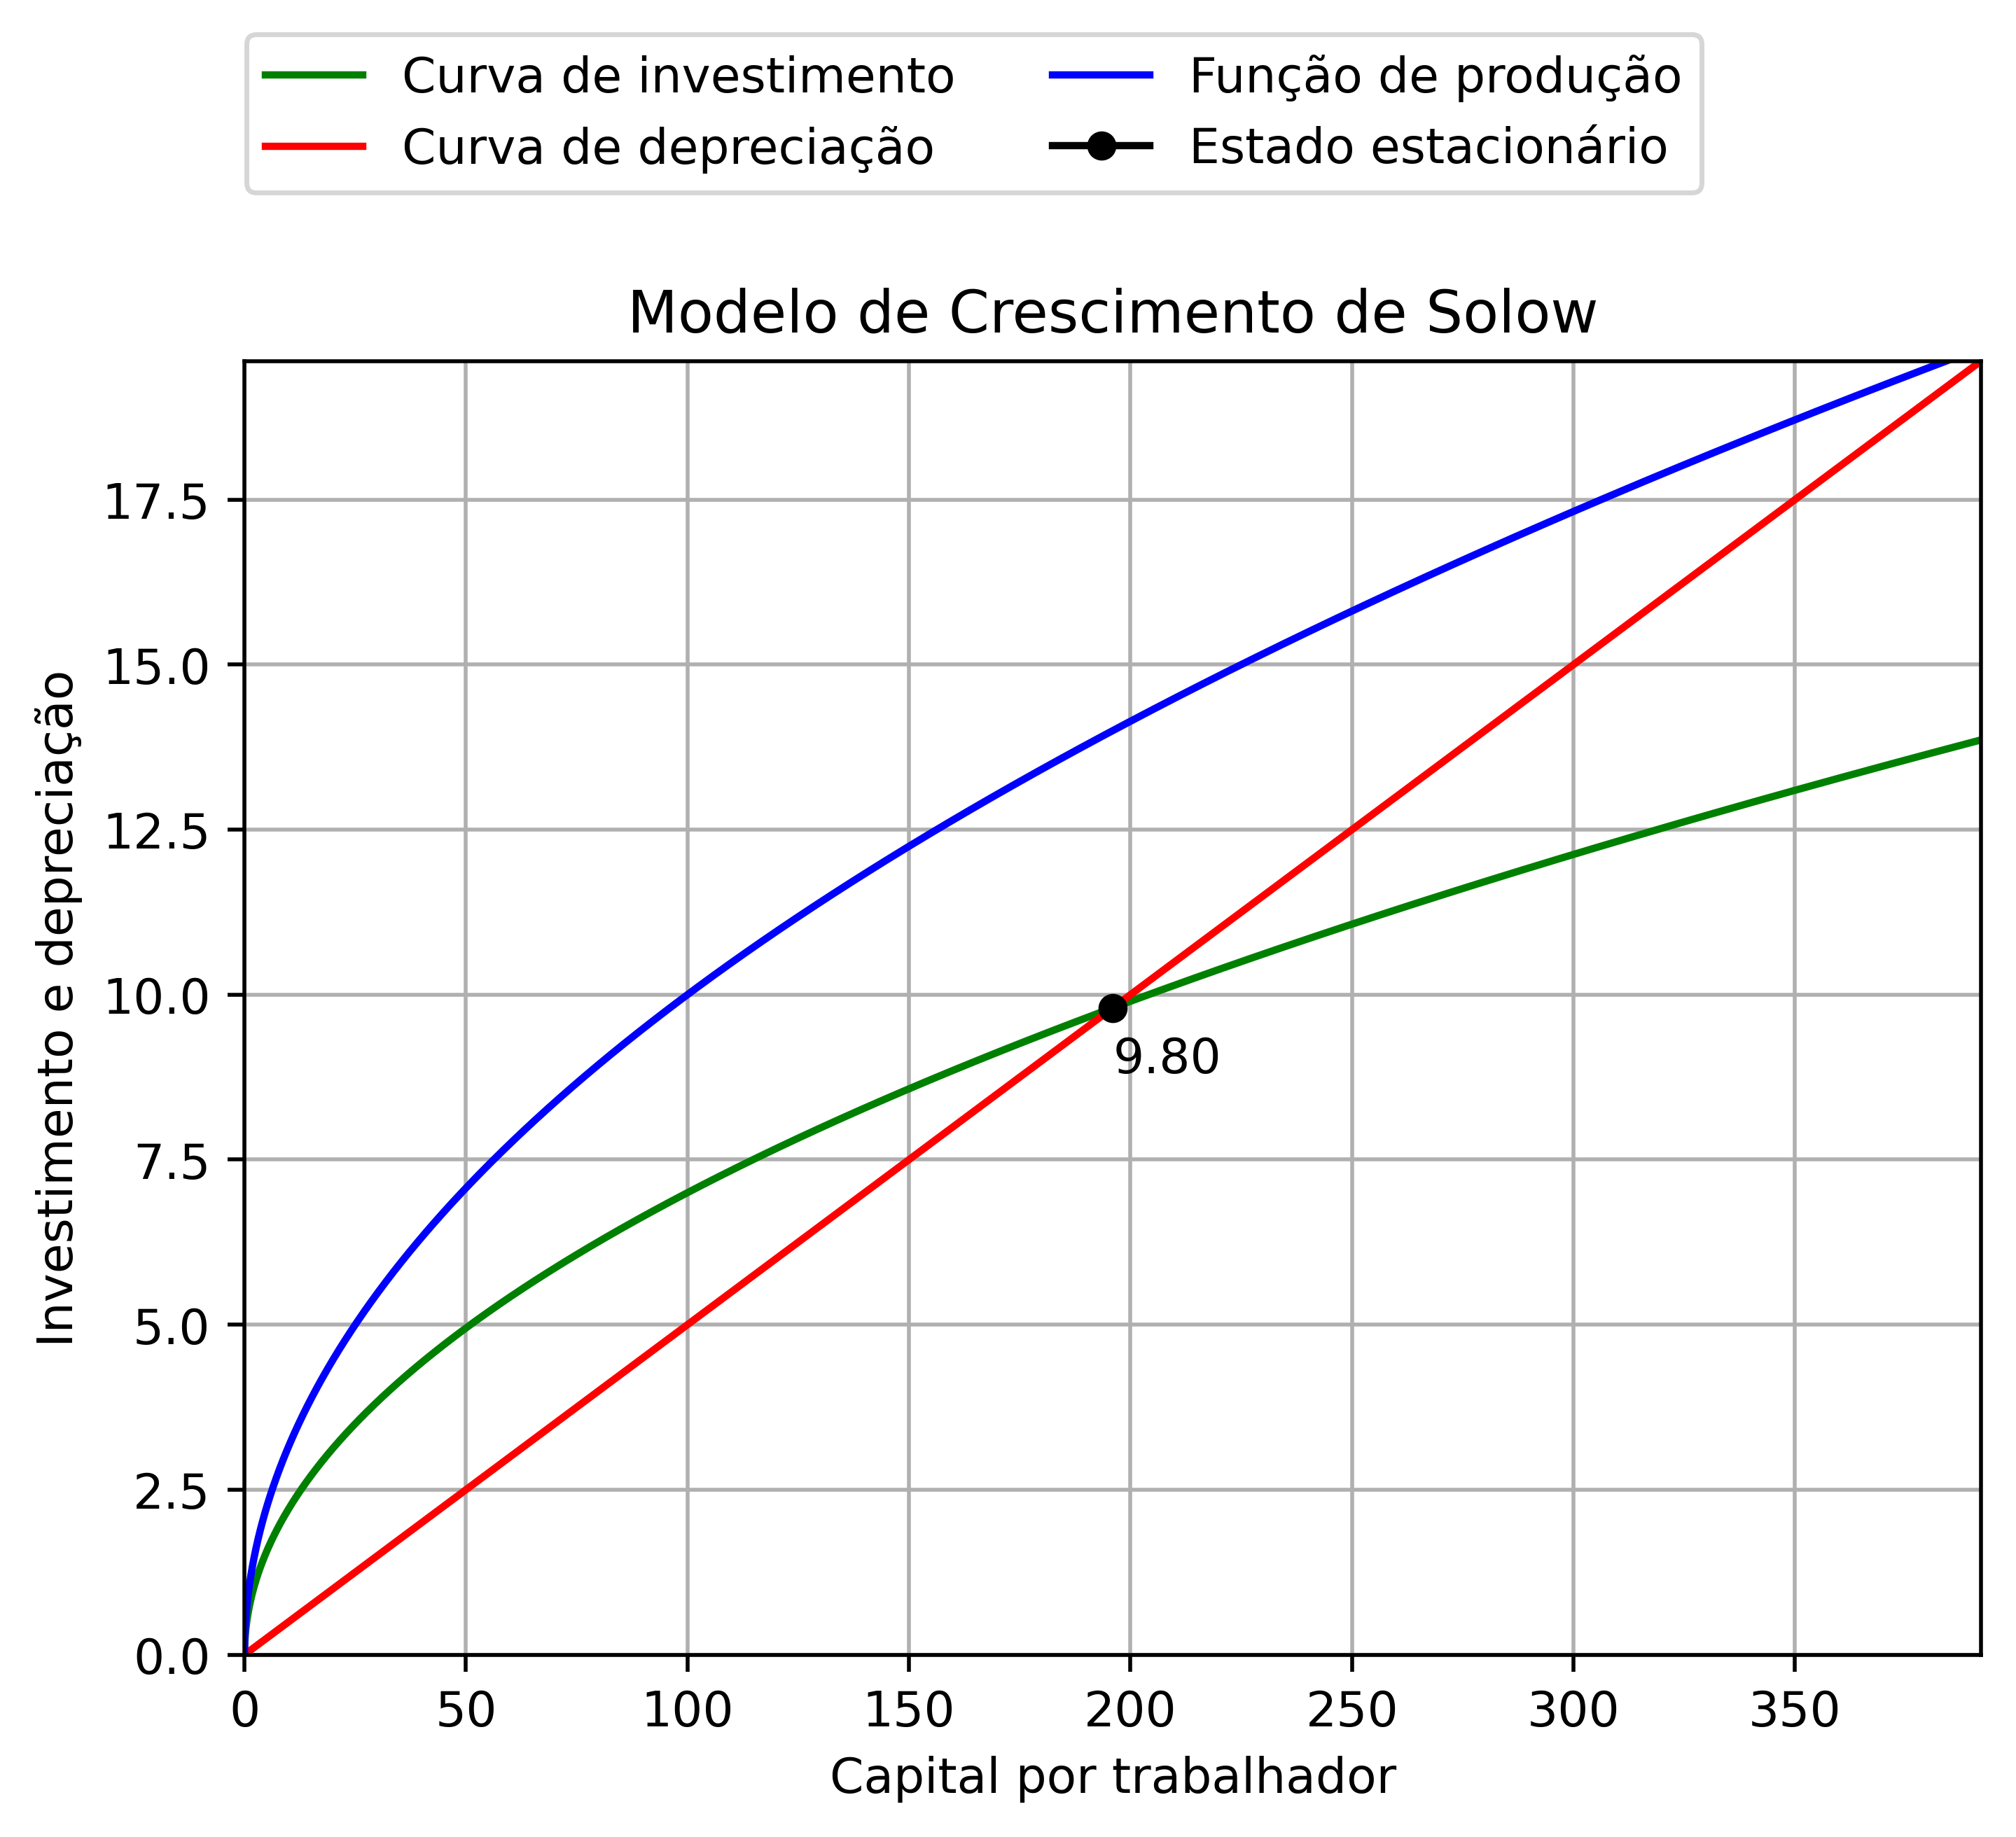

In [1]:
# Calcula o nível de capital no estado estacionário

# Importa os módulos necessários
import numpy as np
import matplotlib.pyplot as plt

# Define os parâmetros que serão usados
a = 0.5 # Alpha
d = 0.05 # Taxa de depreciação
s = 0.7 # Taxa de poupança
k_inicial = 7 # Capital inicial

# Cria a função de produção
funcao_producao = lambda k, a: k ** a

# Calcula o capital final
k_final = lambda k_inicial, a, d, s: (k_inicial
                                      + (s * funcao_producao(k_inicial, a))
                                      - (d * k_inicial))

# Calcula o capital no estado estacionário
def estacionario(k_inicial, a, d, s):
    global k_estacionario
    capital_depreciado = d * k_inicial
    capital_investido = s * funcao_producao(k_inicial, a)
    k_estacionario = k_inicial
    
    while abs(capital_investido - capital_depreciado) > 0.0001:
        k_estacionario = k_final(k_estacionario, a, d, s)
        capital_depreciado = d * k_estacionario
        capital_investido = s * funcao_producao(k_estacionario, a)

# Chama a função
estacionario(k_inicial, a, d, s)

# Plotando o gráfico

# Cria as curvas de produção, investimento e depreciação
producao = funcao_producao(k_estacionario, a)
investimento = s * producao
depreciacao = d * k_estacionario

# Cria as listas vazias
lista_investimento = []
lista_depreciacao = []
lista_producao = []

# Cria um intervalo para calcular as curvas em cada k 
intervalo_capital = np.linspace(0, k_estacionario * 2, 10000)

# Anexa valores às listas
for capital in intervalo_capital:
    lista_investimento.append(s * funcao_producao(capital, a))
    
for capital in intervalo_capital:
    lista_depreciacao.append(d * capital)
    
for capital in intervalo_capital:
    lista_producao.append(funcao_producao(capital, a))

# Cria as curvas
fig, ax = plt.subplots(dpi = 500) # Nitidez
ax.plot(intervalo_capital, lista_investimento, label = "Curva de investimento",
        color = "green") # Curva de investimento
ax.plot(intervalo_capital, lista_depreciacao, label = "Curva de depreciação",
        color = "red") # Curva de depreciação
ax.plot(intervalo_capital, lista_producao, label = "Função de produção",
        color = "blue") # Função de produção

# Cria o ponto estacionário e coloca a legenda
ax.plot(k_estacionario, investimento, markersize = 5,
        marker = "o", color = "black", label = "Estado estacionário") # Ponto estacionário
ax.legend(bbox_to_anchor=(0.001, 1.13, 0.5, 1.2), loc=3,
          fancybox=True, shadow = False, ncol = 2, borderaxespad=0) # Box de legenda
plt.title("Modelo de Crescimento de Solow")

# Define os intervalos e coloca a legenda nos eixos e no ponto
ax.set_xlim(0, k_estacionario * 2) # Intervalo do eixo x
ax.set_ylim(0, investimento * 2) # Intervalo do eixo y
ax.set_xlabel("Capital por trabalhador") # Da nome ao eixo x
ax.set_ylabel("Investimento e depreciação") # Da nome ao eixo y
ax.annotate("%.2f" %(investimento), (k_estacionario, 0.90 * investimento))

# Coloca grade e plota o gráfico
plt.grid(True) # Coloca grade no gráfico
plt.show() # Plota o gráfico